<a href="https://colab.research.google.com/github/Rajeeb321123/Deep-learning-tensorFlow-Journey/blob/master/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolution Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of  writing algorithms which can discover patterns in visual data. Such as the camera of self-driving car recognizing the car infront.

## Get the data

The images we're working with are from Food101 dataset
(101 different classes of food): https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

However we've modeified it to only use two classes (pizza🍕 & steak) using the images image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑**Note** We start with a smaller data so we can experiment quickly and figure what works(or better yet what doesn't work)



In [25]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip  #wget means: get this file and download in colab

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-21 12:38:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.207, 142.250.152.207, 142.250.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   192MB/s    in 0.5s    

2024-02-21 12:38:25 (192 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial set at the beginning of any machine learning project is becoming one with the data
And for a computer vision project... this is usually means visualizing many samples of data.

In [ ]:
!ls pizza_steak   # ls means: list file in the pizza_steak folder


test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directoreis and {len(filenames)} images in'{dirpath}'.")

There are 2 directoreis and 0 images in'pizza_steak'.
There are 2 directoreis and 0 images in'pizza_steak/test'.
There are 0 directoreis and 250 images in'pizza_steak/test/pizza'.
There are 0 directoreis and 250 images in'pizza_steak/test/steak'.
There are 2 directoreis and 0 images in'pizza_steak/train'.
There are 0 directoreis and 750 images in'pizza_steak/train/pizza'.
There are 0 directoreis and 750 images in'pizza_steak/train/steak'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 21 09:21 .
drwxr-xr-x 1 root root 4096 Feb 21 09:21 ..
drwxr-xr-x 4 root root 4096 Feb 21 09:21 test
drwxr-xr-x 4 root root 4096 Feb 21 09:21 train


In [26]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))  # listdir is method to list all the names in directories

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [27]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from subdirectories
print(class_names)

['pizza' 'steak']


In [28]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# to select image randomly image
def view_random_image(target_dir, target_class): #target_dir in directory, target_class is either steak or pizza here
  # Setup the target directory (we'll view iamges from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder  + "/" + random_image[0]) # we random_image in list format so, we change into string path format to read
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:{img.shape}") # show the shape of the image

  return img # why we return img because when after read in below it turns into a big array and consider into tensor


['259449.jpg']
Image shape:(382, 512, 3)


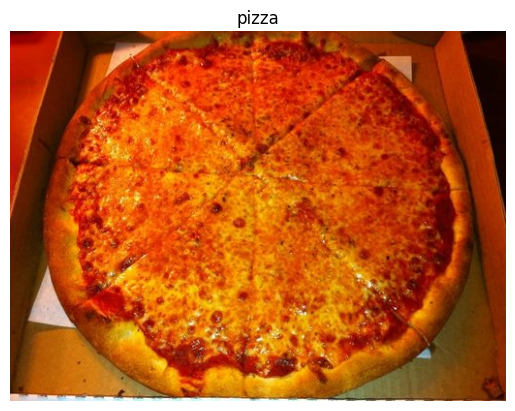

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

array([[[ 70,   0,   0],
        [ 70,   0,   0],
        [ 70,   0,   0],
        ...,
        [ 16,   2,   0],
        [ 16,   2,   0],
        [ 16,   2,   0]],

       [[ 79,   1,   1],
        [ 78,   3,   0],
        [ 80,   2,   2],
        ...,
        [ 17,   3,   0],
        [ 17,   3,   0],
        [ 17,   3,   0]],

       [[ 94,   3,   2],
        [ 93,   4,   0],
        [ 94,   3,   2],
        ...,
        [ 18,   3,   0],
        [ 19,   4,   1],
        [ 19,   4,   1]],

       ...,

       [[230, 188, 164],
        [230, 188, 164],
        [233, 188, 167],
        ...,
        [ 73,  20,   6],
        [ 93,  34,  18],
        [100,  37,  20]],

       [[226, 188, 167],
        [225, 187, 166],
        [228, 187, 169],
        ...,
        [ 77,  20,   0],
        [ 95,  30,   8],
        [ 97,  29,   6]],

       [[223, 186, 167],
        [224, 187, 168],
        [227, 188, 171],
        ...,
        [112,  54,  32],
        [125,  58,  32],
        [127,  55,  30]]], dtype=uint8)
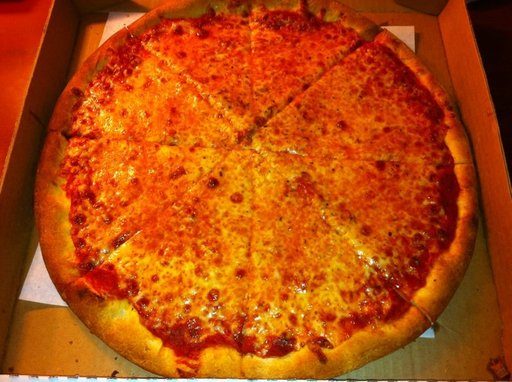

In [ ]:
img

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 76,  67,  72],
        [ 76,  67,  72],
        [ 75,  66,  71],
        ...,
        [ 72,  86, 121],
        [ 73,  87, 122],
        [ 72,  86, 121]],

       [[ 75,  66,  71],
        [ 74,  65,  70],
        [ 73,  64,  69],
        ...,
        [ 69,  84, 117],
        [ 70,  85, 118],
        [ 71,  86, 119]],

       [[ 73,  66,  73],
        [ 73,  66,  73],
        [ 72,  65,  72],
        ...,
        [ 67,  84, 112],
        [ 69,  86, 114],
        [ 70,  87, 115]],

       ...,

       [[142,  83,  39],
        [128,  71,  28],
        [117,  61,  24],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  8,   8,   6]],

       [[136,  74,  27],
        [125,  64,  19],
        [119,  60,  16],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  8,   8,   6]],

       [[149,  85,  37],
        [141,  79,  30],
        [138,  77,  32],
        ...,
        [  8,   8,   

In [ ]:
# View the image shape
img.shape  # returns width, height, color channels

(382, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common perprocessing steps for working with images is to **scale**( also referred to as **normalized**) their pixel values by dividing the image by 255. (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.2745098 , 0.        , 0.        ],
        [0.2745098 , 0.        , 0.        ],
        [0.2745098 , 0.        , 0.        ],
        ...,
        [0.0627451 , 0.00784314, 0.        ],
        [0.0627451 , 0.00784314, 0.        ],
        [0.0627451 , 0.00784314, 0.        ]],

       [[0.30980392, 0.00392157, 0.00392157],
        [0.30588235, 0.01176471, 0.        ],
        [0.31372549, 0.00784314, 0.00784314],
        ...,
        [0.06666667, 0.01176471, 0.        ],
        [0.06666667, 0.01176471, 0.        ],
        [0.06666667, 0.01176471, 0.        ]],

       [[0.36862745, 0.01176471, 0.00784314],
        [0.36470588, 0.01568627, 0.        ],
        [0.36862745, 0.01176471, 0.00784314],
        ...,
        [0.07058824, 0.01176471, 0.        ],
        [0.0745098 , 0.01568627, 0.00392157],
        [0.0745098 , 0.01568627, 0.00392157]],

       ...,

       [[0.90196078, 0.7372549 , 0.64313725],
        [0.90196078, 0.7372549 , 0.64313725],
        [0.91372549, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel value between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches. This will create data and labels automatically for us that can be fitted our created model
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # size 224,224 hold good amount of info, but 512, 512 may be too much
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory =test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D (filters=10,
                            kernel_size=3,
                            activation="relu",
                            input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 145ms/step - loss: 0.6581 - accuracy: 0.6160 - val_loss: 0.5056 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 7s 147ms/step - loss: 0.5177 - accuracy: 0.7627 - val_loss: 0.4460 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4942 - accuracy: 0.7700 - val_loss: 0.3783 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4319 - accuracy: 0.8133 - val_loss: 0.3825 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4054 - accuracy: 0.8193 - val_loss: 0.3378 - val_accuracy: 0.8580


> **Note:** if the above cell is taking longer than ~10 seconds per epoch, make sure you're using GPU in runtime type

In [ ]:
len(train_data) # amount of images in each batches

47

In [ ]:
1500/32 # we we have slice the 1500 images into 32 batches each with 47 images

46.875

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

⚒️ **Exercise:** Go through the CNN explainer website for minimum of 10 minute and compare our neural network with theirs. https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've build in a previous section to see if it works our image dot.

The model we're building is from *TensorFlow playground*

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow playground
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )


Epoch 1/5
47/47 [==============================] - 6s 111ms/step - loss: 0.8232 - accuracy: 0.5093 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 151ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 134ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), mode_2 perform terribly... let's try to improve it

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )


Epoch 1/5
47/47 [==============================] - 7s 128ms/step - loss: 1.7717 - accuracy: 0.6453 - val_loss: 0.7284 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.8670 - accuracy: 0.6987 - val_loss: 0.5586 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6407 - accuracy: 0.7240 - val_loss: 0.7218 - val_accuracy: 0.6800
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6132 - accuracy: 0.7287 - val_loss: 1.0483 - val_accuracy: 0.5540
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6112 - accuracy: 0.7300 - val_loss: 0.4867 - val_accuracy: 0.7740


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
15000000/31000

483.8709677419355

> 🔑 **Note** You can think of trainable parameters as **patterns a model can learn from data**. Intutively, you might think more is better. And in lots of casses, it is. But in this case, the difference here is the two different style of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a highe number of possible learnable patterns, a convolution neural network seeks to sort out and learn the most important patterns in an image. So even though these are learnable parameters in our convolution neural network, these are often more helpful in dechiphering between features in an image.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize).
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches).
3. Created a model (start with a baseline).
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model(try to beat our baseline).
7. Repeat until satisfied (experiment, experiment, experiment).

### 1. Become one with the data

['2599817.jpg']
Image shape:(512, 512, 3)
['2831983.jpg']
Image shape:(512, 512, 3)


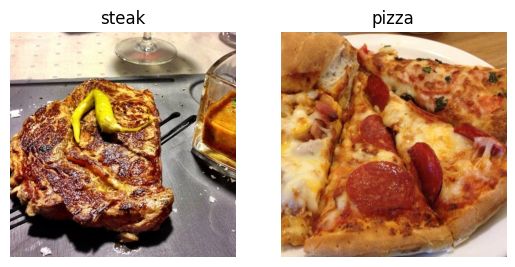

In [29]:
# Visualize data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [30]:
# Define the directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is small subset of data. Rather than look at all -10, 000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10000, images (or more) might not fit into the memory of your Processor (GPU).
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able learn very well.

Why 32?
Because it might be good for your health. Training with large mini-batches is bad for test error. https://x.com/ylecun/status/989610208497360896?s=20 by founder of CNN

In [31]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [57]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of image(height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into
test_data = test_datagen.flow_from_directory(test_dir,
                                          target_size=(224, 224),
                                          class_mode="binary",
                                          batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [33]:
# Get a sample of training data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the firest two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
images[7]

array([[[0.30588236, 0.17254902, 0.227451  ],
        [0.34901962, 0.21960786, 0.25490198],
        [0.4039216 , 0.2784314 , 0.2901961 ],
        ...,
        [0.16470589, 0.02745098, 0.1137255 ],
        [0.16862746, 0.01960784, 0.11764707],
        [0.15686275, 0.00784314, 0.10588236]],

       [[0.28235295, 0.14901961, 0.20392159],
        [0.34117648, 0.21176472, 0.24705884],
        [0.42352945, 0.29803923, 0.30980393],
        ...,
        [0.17254902, 0.02352941, 0.1137255 ],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16078432, 0.01176471, 0.10980393]],

       [[0.26666668, 0.13333334, 0.19607845],
        [0.32941177, 0.20000002, 0.23529413],
        [0.42352945, 0.29803923, 0.31764707],
        ...,
        [0.19215688, 0.04313726, 0.13333334],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16862746, 0.03137255, 0.1254902 ]],

       ...,

       [[0.62352943, 0.5803922 , 0.5647059 ],
        [0.6039216 , 0.56078434, 0.54509807],
        [0.6039216 , 0

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3.  Create a model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then only introduce complexity as required (eg. look at which current model is performing best in the field  for your problem).

> to check the state of the art for image classification look at webiste paper with code. https://paperswithcode.com/task/image-classification

In [34]:
# Make the creating of our model a littel easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [35]:
model_4 = Sequential([
    # to know about arguments give video no 119
    # and also CNN explainer website
    Conv2D(filters=10, # fiters is the number of sliding window going across the input image
           # kernel_size is the size of sliding windo going  across an input
           kernel_size=3, # we can write also write kernel_size]=(3,3) as 3 X 3 matrix
           strides=1, # ths size of the step the sliding window takes across an input
           padding="valid",  # if "same", output shape is same as input shape. if "valid" output shape gets comporessed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer specifies input shape
    Conv2D(10, 3 , activation="relu"), # we can write like previous but this way is just faster
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid"), # output layer (working with binary classification so only 1 output neuron)
])

⚒️ Practise: Understand what's going on in Conv2D layer by going through CNN explainer website for 10-20 minutes:
https://poloclub.github.io/cnn-explainer/

In [36]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [37]:
# Get the summary of model_4 : How input shape changes throughout
model_4.summary()
# look at output shape in each layer: eg: 222 to 220 to 218: after each layer it is getting smaller/compressed because padding="valid" in model_4

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [38]:
# Check the lengths of training adn test data generators
len(train_data), len(test_data)

(47, 16)

In [39]:
# Fit the  model
history_4 = model_4.fit(train_data, # this is the combination of labels and sample
                        epochs=5,
                        steps_per_epoch=len(train_data), # going throught all the batches
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 124s 3s/step - loss: 2.6930 - accuracy: 0.6127 - val_loss: 0.5300 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 125s 3s/step - loss: 0.4723 - accuracy: 0.7933 - val_loss: 0.3868 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 125s 3s/step - loss: 0.4011 - accuracy: 0.8333 - val_loss: 0.3845 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 127s 3s/step - loss: 0.3381 - accuracy: 0.8733 - val_loss: 0.4330 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 125s 3s/step - loss: 0.1873 - accuracy: 0.9407 - val_loss: 0.4393 - val_accuracy: 0.8160


## 5. Evaluating our model

It looks like our model is learning something. Let's evalute it.


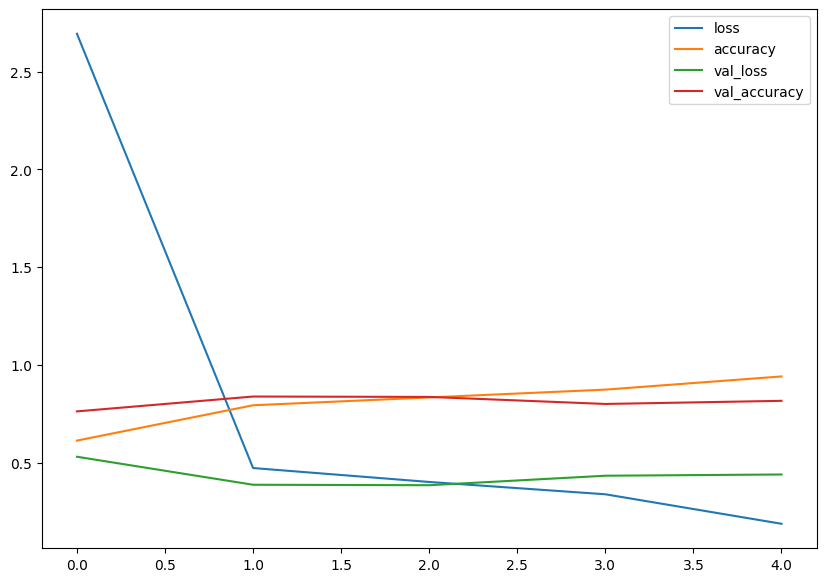

In [42]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [46]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range (len(history.history["loss"])) # how a many epochs did we ran for?

  # Plot loss
  plt.plot(epochs,loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> 🔑 **Note** When a model's  **Validaion_loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize the unseen data will be diminished.

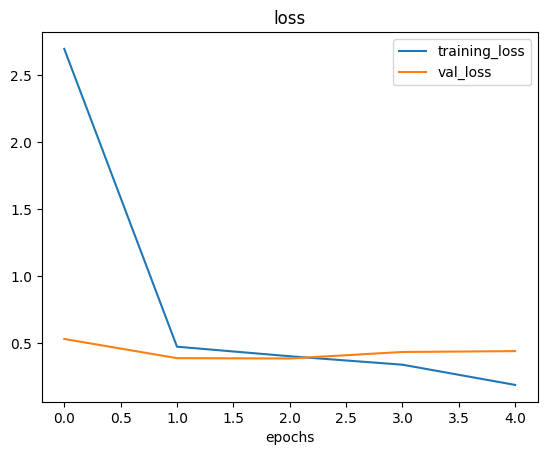

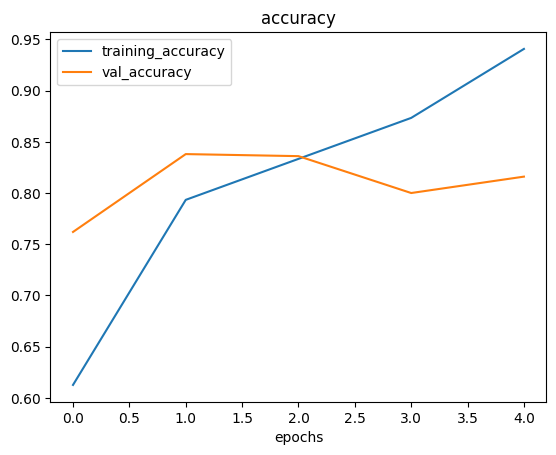

In [47]:
# Check out  the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of numbers of filter
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentaion
* Add regularization layers (such as MaxPool2D)
* Add more data...

🔑 **Notes** Reducing overfitting is also known as regularization

In [58]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])

In [59]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [60]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 50s 1s/step - loss: 0.6040 - accuracy: 0.6760 - val_loss: 0.4821 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 55s 1s/step - loss: 0.5015 - accuracy: 0.7613 - val_loss: 0.4002 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 52s 1s/step - loss: 0.4276 - accuracy: 0.8100 - val_loss: 0.3679 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 53s 1s/step - loss: 0.4242 - accuracy: 0.8087 - val_loss: 0.4456 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 49s 1s/step - loss: 0.4126 - accuracy: 0.8127 - val_loss: 0.3351 - val_accuracy: 0.8480


In [61]:
# Get a summary of  model_5 with max pooling
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 10)       

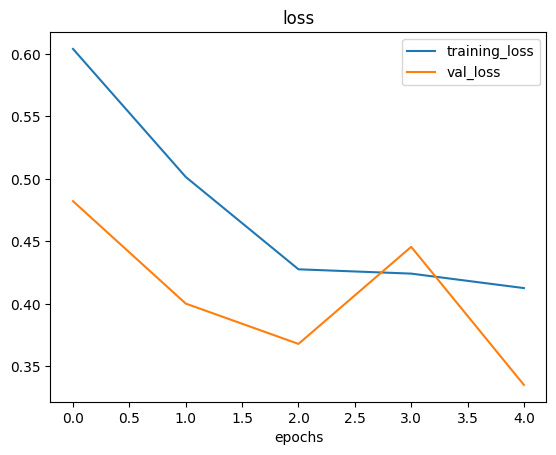

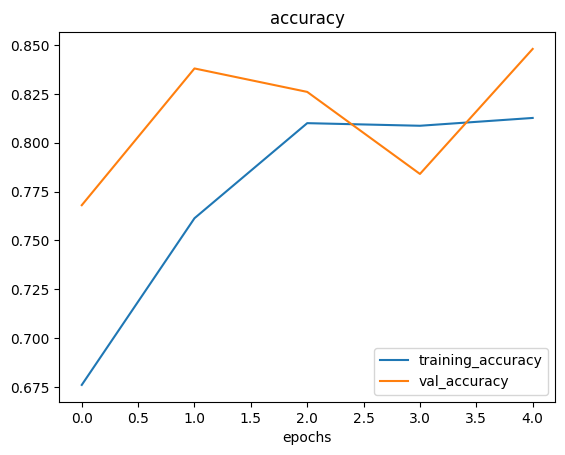

In [62]:
# Plot the loss curve
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentaion

In [63]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                          #  Their many more data augmentation beside these , look at docs
                                           rotation_range=0.2, # how much do you want to rotate an image randomly between the range of 0 to 0.2
                                           shear_range=0.2, # how much you want to shear an image
                                           zoom_range=0.2, # zoomed randomly
                                           width_shift_range=0.2, # move in x -axis
                                           height_shift_range=0.3, # move in y-axis
                                           horizontal_flip=True) # do you want to flip the images

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentaion for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


> 🤔 **Question** what is data augmentation?

Data augmentation is the process of altering our training data, leading to have more diversity and in turn allowing or models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation

In [65]:
# Import data and augment it from training directory
IMG_SIZE=(224, 224)
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purpose only

# Created non-augmented train data batches
print("Non-Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode="binary",
                                                shuffle=False) # for demonstration purpose only
print("Non-Augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode="binary",
                                                shuffle=False) # for demonstration purpose only

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented test data
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentaion is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentaion parameters our images are left as they are in directories as they 're loaded into model.


Finally...let's visualize some augmented data

In [66]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels aren't augmented, only images are augmented

showinf image number:10


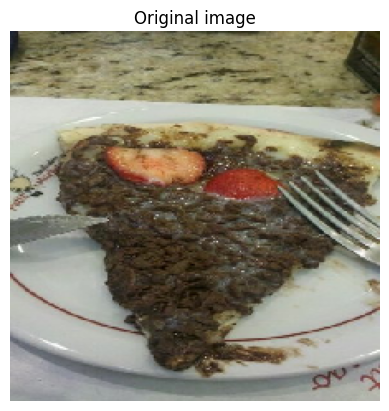

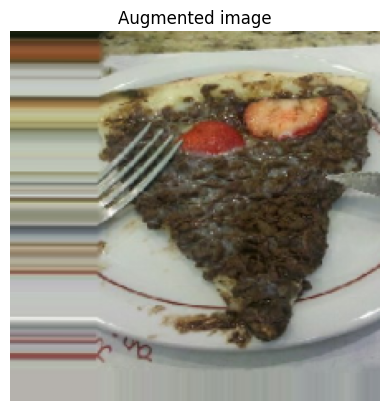

In [72]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch size are 32... so random from 0 to 31
print(f"showinf image numbeNOr:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


Now we've seen what augmented training data looks like, let's build a model and see how it learns

In [73]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2), # take the max from 2 X 2 matrix and downsample
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [74]:

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 67s 1s/step - loss: 0.7183 - accuracy: 0.4647 - val_loss: 0.6795 - val_accuracy: 0.6560
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.6866 - accuracy: 0.5580 - val_loss: 0.6634 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 66s 1s/step - loss: 0.6813 - accuracy: 0.5860 - val_loss: 0.6333 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 69s 1s/step - loss: 0.6451 - accuracy: 0.6473 - val_loss: 0.5239 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 66s 1s/step - loss: 0.6002 - accuracy: 0.6673 - val_loss: 0.5394 - val_accuracy: 0.7100


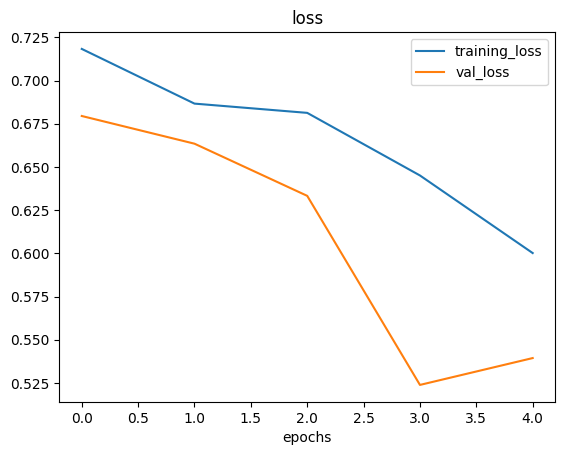

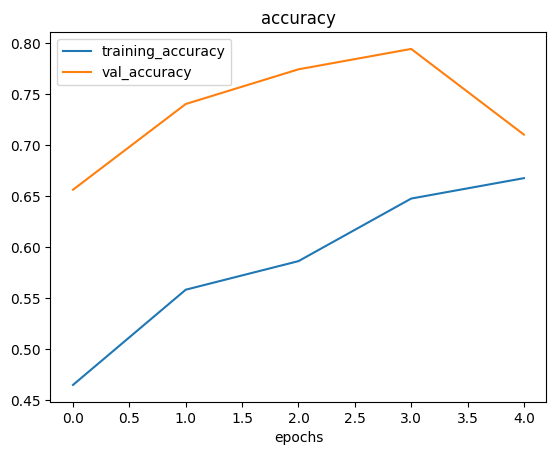

In [75]:
# Check our models training curves
plot_loss_curves(history_6)